In [2]:
import pandas as pd
import matplotlib.pyplot as plt

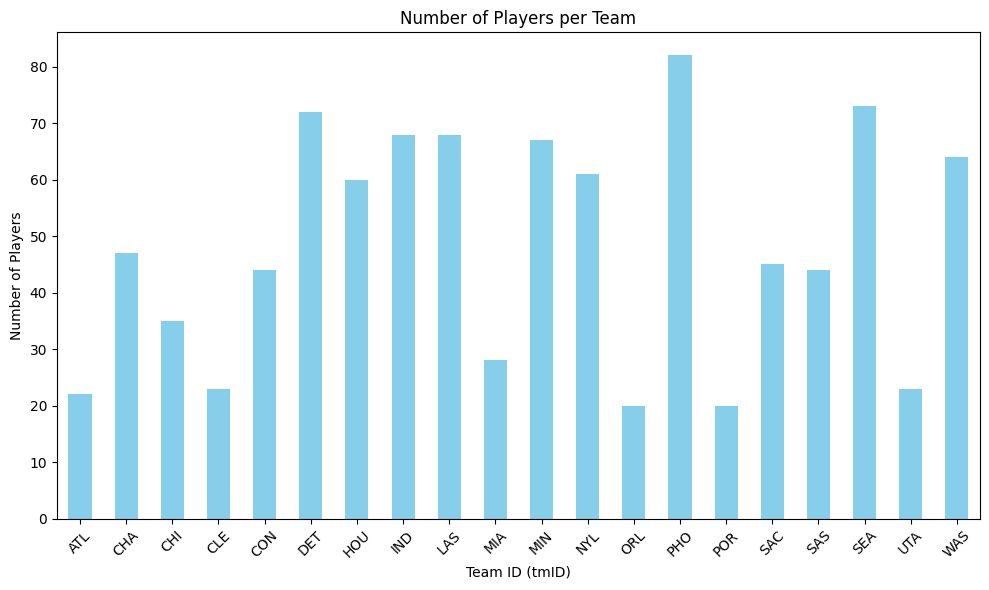

In [7]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('players_teams.csv')

# Group the data by 'tmID' and count the number of unique 'playerID' in each group
grouped_data = df.groupby('tmID')['playerID'].nunique()

# Plot the grouped data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Team ID (tmID)')
plt.ylabel('Number of Players')
plt.title('Number of Players per Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Load the "teamsClean" CSV file into a pandas DataFrame
teams_clean_df = pd.read_csv('teamsClean.csv')

# List of columns to remove
columns_to_remove = ['tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB']

# Drop the specified columns from the DataFrame
teams_clean_df.drop(columns=columns_to_remove, inplace=True)

# Now, teams_clean_df contains the data from "teamsClean" CSV file without the specified columns


KeyError: "['tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'] not found in axis"

In [ ]:
teams_clean_df


,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,6,WNBA,WAS,WAS,EA,NaN,5,N,0,NaN,...,34,10,7,6,11,9,11,6900,171501,Verizon Center
138,7,WNBA,WAS,WAS,EA,NaN,4,Y,0,L,...,34,13,4,5,12,12,8,6850,133255,Verizon Center
139,8,WNBA,WAS,WAS,EA,NaN,5,N,0,NaN,...,34,8,9,8,9,8,12,6900,133255,Verizon Center
140,9,WNBA,WAS,WAS,EA,NaN,6,N,0,NaN,...,34,6,11,4,13,6,14,6825,154637,Verizon Center


In [15]:
teams_clean_df.to_csv('teamsClean.csv', index=False)


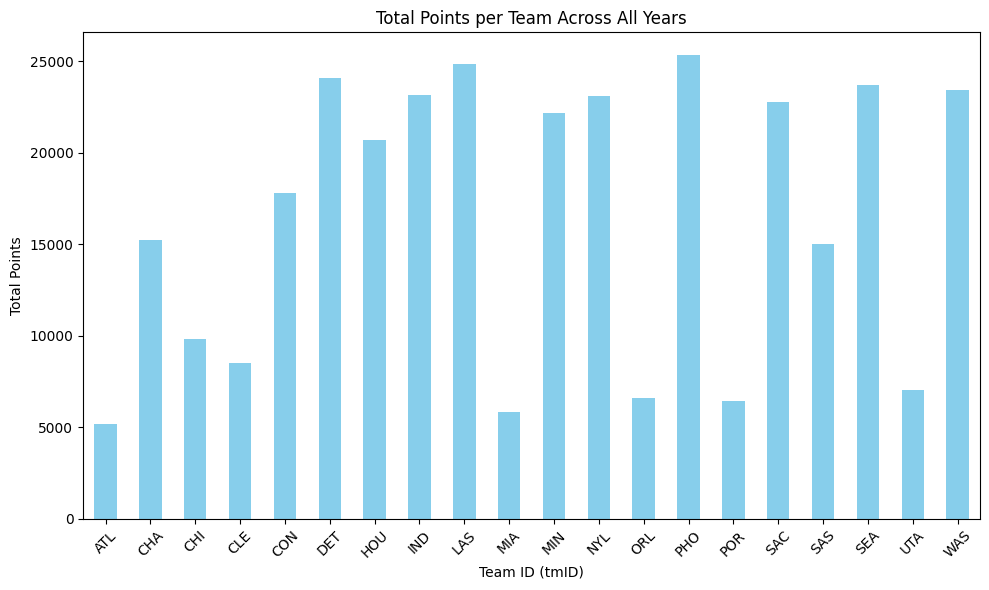

In [ ]:
# Load the "player_teams.csv" file into a pandas DataFrame
player_teams_df = pd.read_csv('players_teams.csv')

# Group the data by 'tmID' and calculate the sum of points for each team
grouped_data = player_teams_df.groupby('tmID')['points'].sum()

# Plot the total points across all the years
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Team ID (tmID)')
plt.ylabel('Total Points')
plt.title('Total Points per Team Across All Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

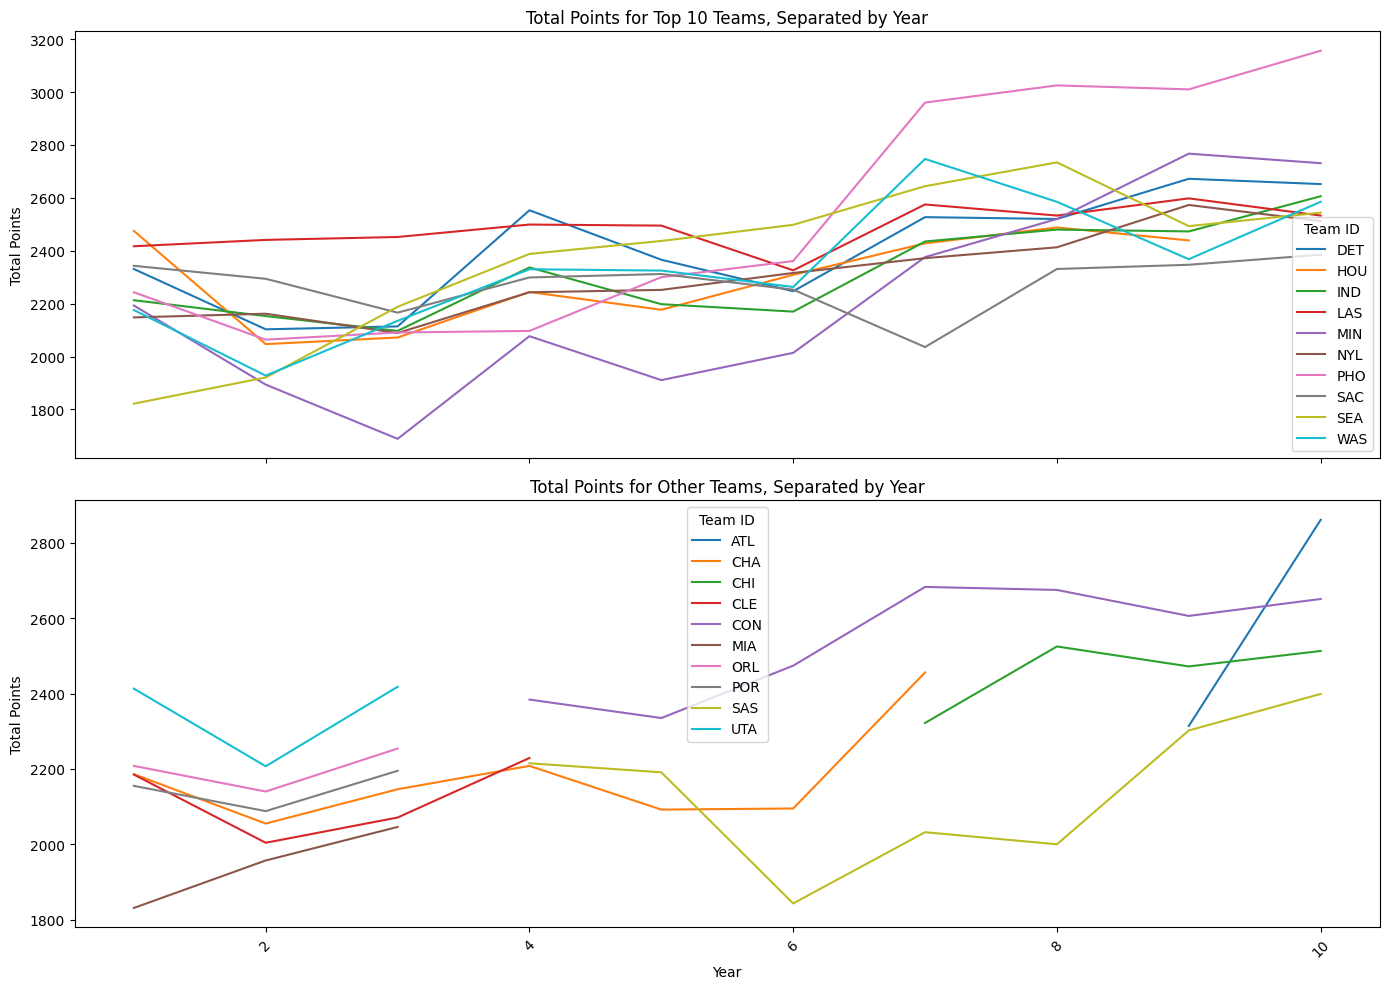

In [ ]:
# Group the data by 'year' and 'tmID', then calculate the sum of points for each team in each year
grouped_data = player_teams_df.groupby(['year', 'tmID'])['points'].sum().reset_index()

# Get the top 10 teams with highest total points across all years
top_10_teams = grouped_data.groupby('tmID')['points'].sum().nlargest(10).index

# Separate the data for top 10 teams and others
top_10_teams_data = grouped_data[grouped_data['tmID'].isin(top_10_teams)]
other_teams_data = grouped_data[~grouped_data['tmID'].isin(top_10_teams)]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Plot total points for top 10 teams
for team_id, group in top_10_teams_data.groupby('tmID'):
    axes[0].plot(group['year'], group['points'], label=f'{team_id}')

axes[0].set_ylabel('Total Points')
axes[0].set_title('Total Points for Top 10 Teams, Separated by Year')
axes[0].legend(title='Team ID')

# Plot total points for other teams
for team_id, group in other_teams_data.groupby('tmID'):
    axes[1].plot(group['year'], group['points'], label=f'{team_id}')

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Points')
axes[1].set_title('Total Points for Other Teams, Separated by Year')
axes[1].legend(title='Team ID')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


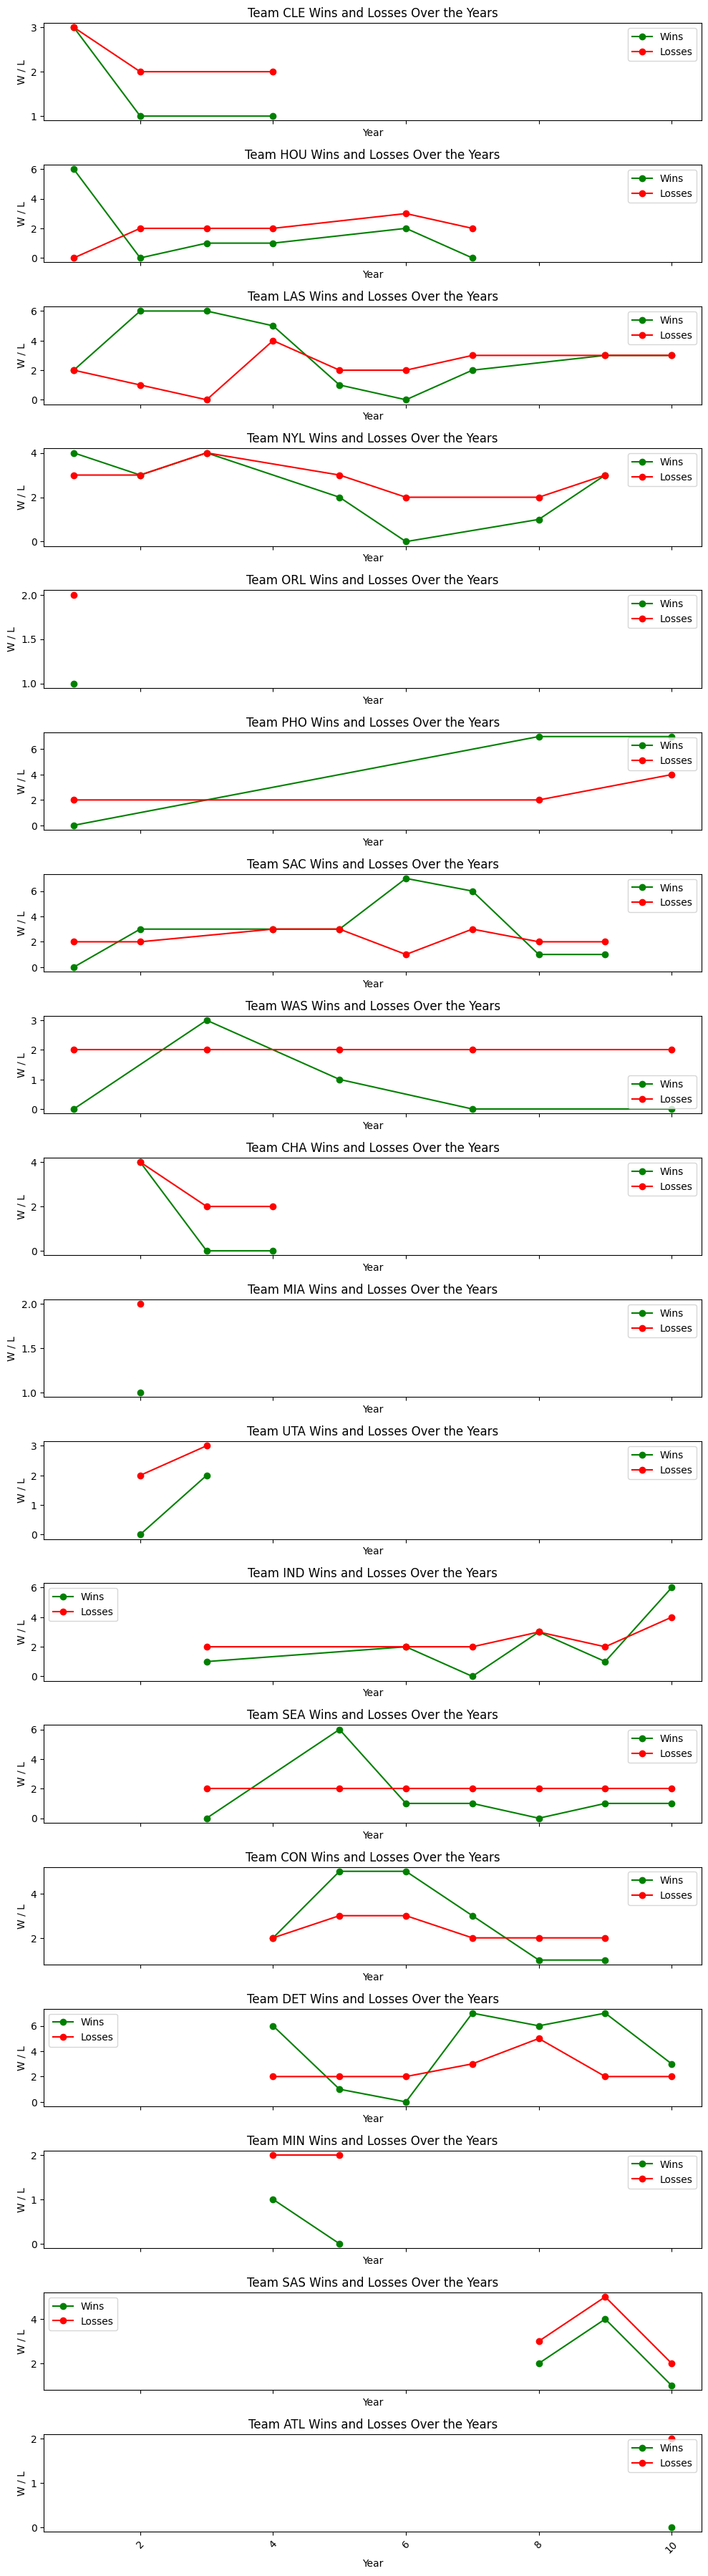

In [ ]:
# Load the "teams_post.csv" file into a pandas DataFrame
teams_post_df = pd.read_csv('teams_post.csv')

# Group the data by 'year' and 'teamID', then calculate the sum of wins ('W') and losses ('L') for each team in each year
grouped_data = teams_post_df.groupby(['year', 'tmID'])[['W', 'L']].sum().reset_index()

# Get unique team IDs
unique_teams = grouped_data['tmID'].unique()

# Create subplots for each team's wins and losses
fig, axes = plt.subplots(nrows=len(unique_teams), ncols=1, figsize=(10, 2 * len(unique_teams)), sharex=True)


# Plot wins and losses for each team
for i, team_id in enumerate(unique_teams):
    team_data = grouped_data[grouped_data['tmID'] == team_id]
    axes[i].plot(team_data['year'], team_data['W'], label='Wins', marker='o', color='green')
    axes[i].plot(team_data['year'], team_data['L'], label='Losses', marker='o', color='red')
    axes[i].set_title(f'Team {team_id} Wins and Losses Over the Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('W / L')
    axes[i].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig('wins_losses.png')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

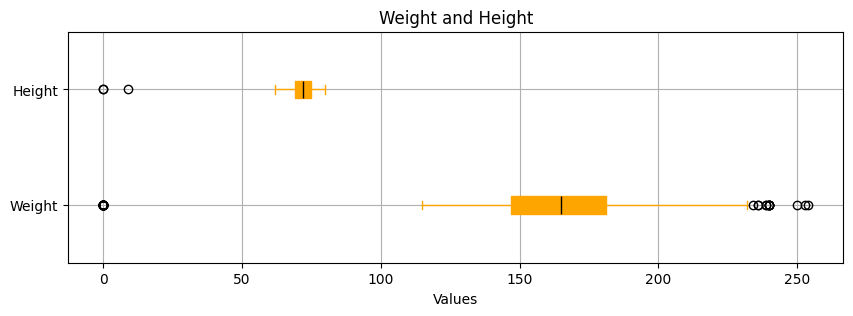

In [ ]:
plt.figure(figsize=(10, 3))
players_clean_df.boxplot(column=['weight', 'height'], vert=False, patch_artist=True, 
                         boxprops=dict(facecolor='orange', color='orange'), 
                         capprops=dict(color='orange'), whiskerprops=dict(color='orange'), 
                         medianprops=dict(color='black'), 
                         positions=[1, 2])
plt.title('Weight and Height')
plt.xlabel('Values')
plt.yticks([1, 2], ['Weight', 'Height'])
plt.show()

In [ ]:
players_clean_df = pd.read_csv('playersClean.csv')

height_outliers = players_clean_df[players_clean_df['height'] < 50]

height_outliers

,bioID,pos,height,weight,college,collegeOther,birthDate


In [ ]:
centers_heights = players_clean_df[players_clean_df['pos'].isin(['C'])]['height'].mean().round(1)
forwards_centers_heights = players_clean_df[players_clean_df['pos'].isin(['F-C'])]['height'].mean().round(1)
forwards_heights = players_clean_df[players_clean_df['pos'].isin(['F'])]['height'].mean().round(1)

In [ ]:
# Find height outliers for each position
height_outliers_centers = players_clean_df[players_clean_df['pos'].isin(['C']) & (players_clean_df['height'] < 50)]
height_outliers_forwards_centers = players_clean_df[players_clean_df['pos'].isin(['F-C']) & (players_clean_df['height'] < 50)]
height_outliers_forwards = players_clean_df[players_clean_df['pos'].isin(['F']) & (players_clean_df['height'] < 50)]


In [ ]:
height_outliers_centers.loc[:, 'height'] = centers_heights
height_outliers_forwards_centers.loc[:, 'height'] = forwards_centers_heights
height_outliers_forwards.loc[:, 'height'] = forwards_heights

players_clean_df.update(height_outliers_centers)
players_clean_df.update(height_outliers_forwards_centers)
players_clean_df.update(height_outliers_forwards)

players_clean_df.to_csv('playersClean.csv', index=False)

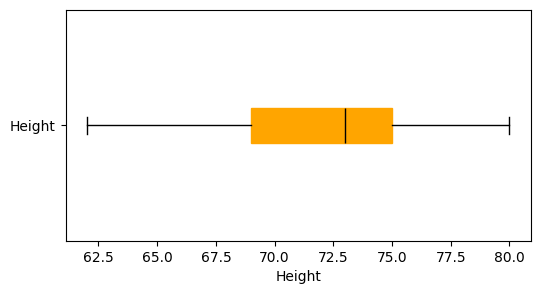

In [ ]:
plt.figure(figsize=(6, 3))
plt.boxplot(players_clean_df['height'], vert=False, patch_artist=True,  boxprops=dict(facecolor='orange', color='orange'), medianprops=dict(color='black') )
plt.xlabel('Height')
plt.yticks([1], ['Height'])
plt.show()


In [ ]:
players_clean_df = pd.read_csv('playersClean.csv')

weight_outliers = players_clean_df[players_clean_df['weight'] ==  0]

weight_outliers

,bioID,pos,height,weight,college,collegeOther,birthDate
7,alberma01w,G,64.0,0,Ohio State,NaN,12/04/1975
29,ayimmi01w,F,75.0,0,Pepperdine,NaN,06/05/1988
51,berezva01w,C,76.0,0,Rice,NaN,10/04/1986
60,bishoab01w,F-C,74.0,0,NaN,NaN,29/11/1988
84,brancli01w,G,64.0,0,Texas A&M,NaN,0000-00-00
...,...,...,...,...,...,...,...
2318,sykesap01w,G-F,72.0,0,Rutgers,NaN,30/07/1990
2379,warleav01w,C,75.0,0,Liberty,NaN,17/05/1987
2411,willisa01w,G-F,72.0,0,Auburn,NaN,24/09/1973
2424,woodki01w,C,76.0,0,Wisconsin-Green Bay,NaN,16/09/1972


In [ ]:
players_clean_df = pd.read_csv('playersClean.csv')

Q1 = players_clean_df['weight'].quantile(0.25)
Q3 = players_clean_df['weight'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
mean_weight_iqr = round(players_clean_df[
    (players_clean_df['weight'] >= lower_bound) & (players_clean_df['weight'] <= upper_bound)
]['weight'].mean())

In [ ]:
players_clean_df.loc[players_clean_df['weight'] == 0, 'weight'] = mean_weight_iqr

players_clean_df.to_csv('playersClean.csv', index=False)



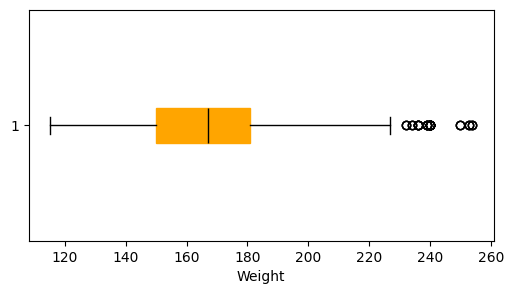

In [ ]:
plt.figure(figsize=(6, 3))
plt.boxplot(players_clean_df['weight'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='orange'), medianprops=dict(color='black'))
plt.xlabel('Weight')
plt.show()

In [ ]:
college_none_entries = players_clean_df[players_clean_df['college'].str.lower() == 'none']

college_none_entries


,bioID,pos,height,weight,college,collegeOther,birthDate
22,arcaija01w,G,71.0,147,none,NaN,11/04/1969
24,askamma01w,C,77.0,198,none,NaN,07/08/1970
90,brcanra01w,C,80.0,198,none,NaN,15/04/1967
117,camba01w,C,80.0,215,none,NaN,18/08/1991
131,cebriel01w,C,77.0,190,none,NaN,07/02/1971
500,morrizi01w,C,76.0,167,none,NaN,15/02/1989
553,petroso01w,F,73.0,167,none,NaN,18/02/1989
735,veselja01w,F,75.0,195,none,NaN,31/12/1983
837,arcaija01w,G,71.0,147,none,NaN,11/04/1969
839,askamma01w,C,77.0,198,none,NaN,07/08/1970


In [ ]:
empty_college_entries = players_clean_df[players_clean_df['college'].isnull()]

players_clean_df['college'].fillna('none', inplace=True)

players_clean_df.to_csv('playersClean.csv', index=False)

In [ ]:
empty_college_entries = players_clean_df[players_clean_df['college'].isnull()]
empty_college_entries 

,bioID,pos,height,weight,college,collegeOther,birthDate


In [ ]:
empty_other_college_entries = players_clean_df[players_clean_df['collegeOther'].isnull()]


players_clean_df['collegeOther'].fillna('none', inplace=True)

players_clean_df.to_csv('playersClean.csv', index=False)

In [ ]:
empty_other_college_entries = players_clean_df[players_clean_df['collegeOther'].isnull()]
empty_other_college_entries

,bioID,pos,height,weight,college,collegeOther,birthDate


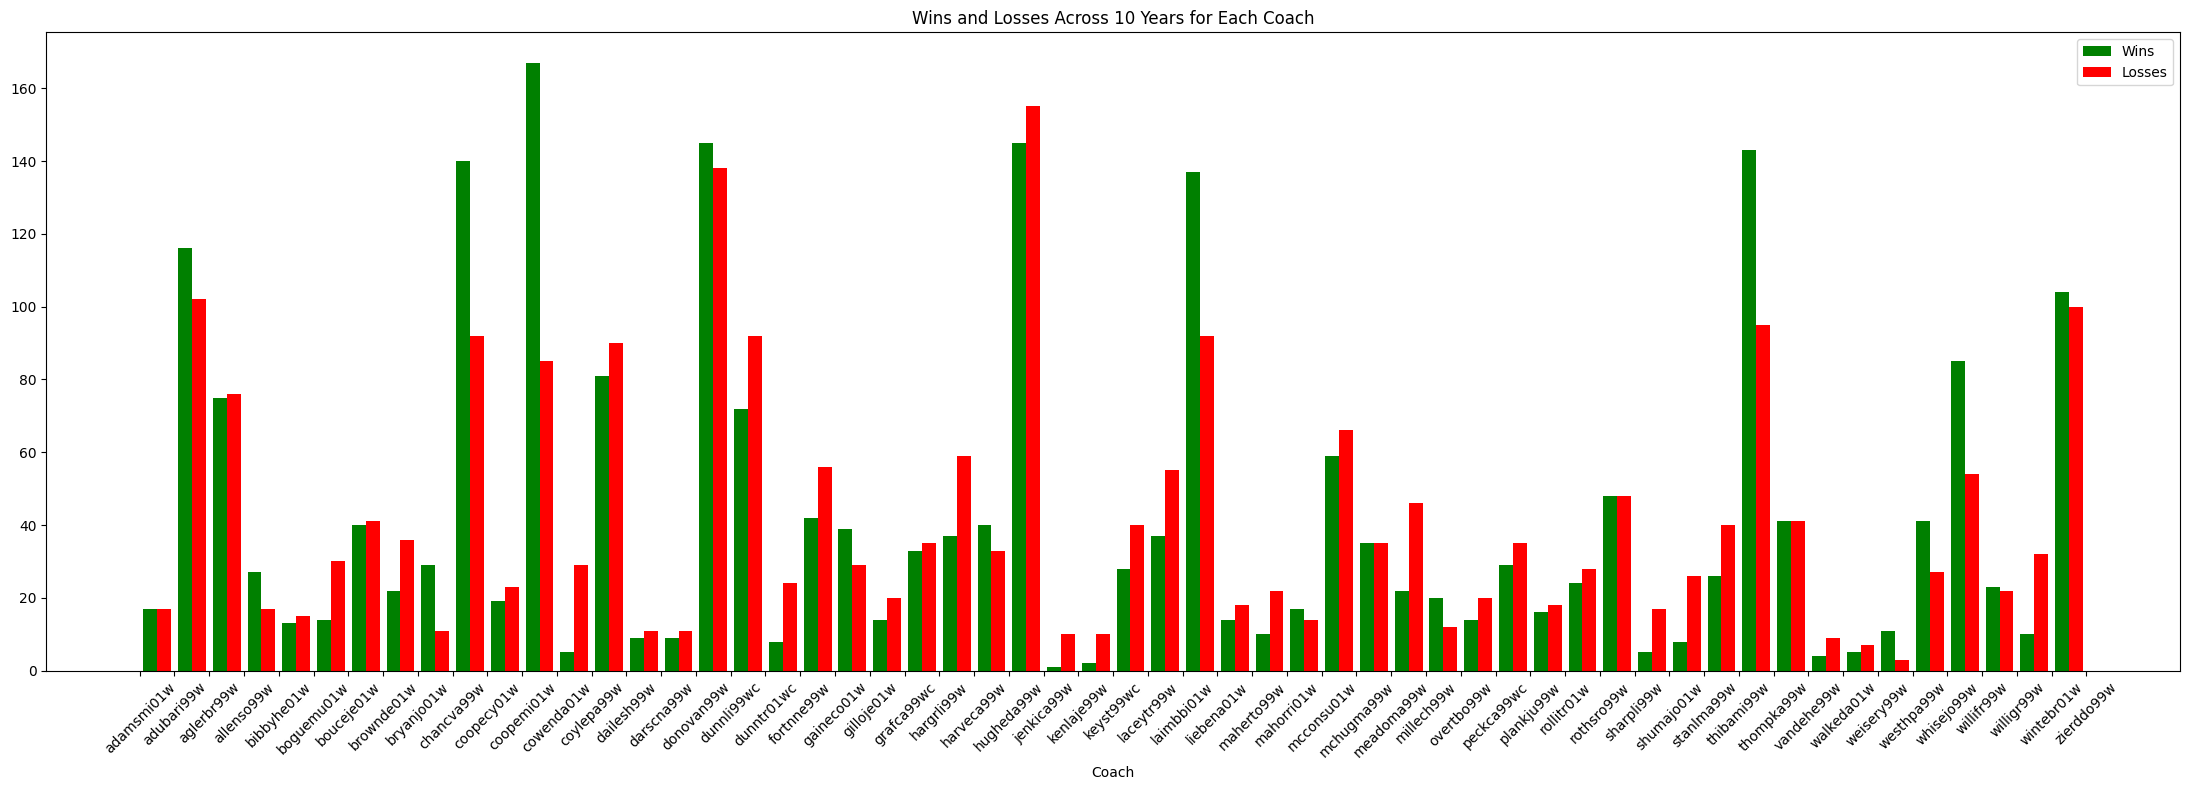

In [35]:
coaches_df = pd.read_csv('coaches.csv')

grouped_data = coaches_df.groupby('coachID')[['won', 'lost']].sum()

plt.figure(figsize=(22, 8))

bins = range(len(grouped_data))

plt.hist([bins, bins], bins=bins, weights=[grouped_data['won'], grouped_data['lost']], color=['green', 'red'], label=['Wins', 'Losses'])
plt.xlabel('Coach')
plt.xticks(bins, grouped_data.index)
plt.xticks(rotation=45)
plt.title('Wins and Losses Across 10 Years for Each Coach')
plt.legend(['Wins', 'Losses'])
plt.tight_layout()
plt.show()



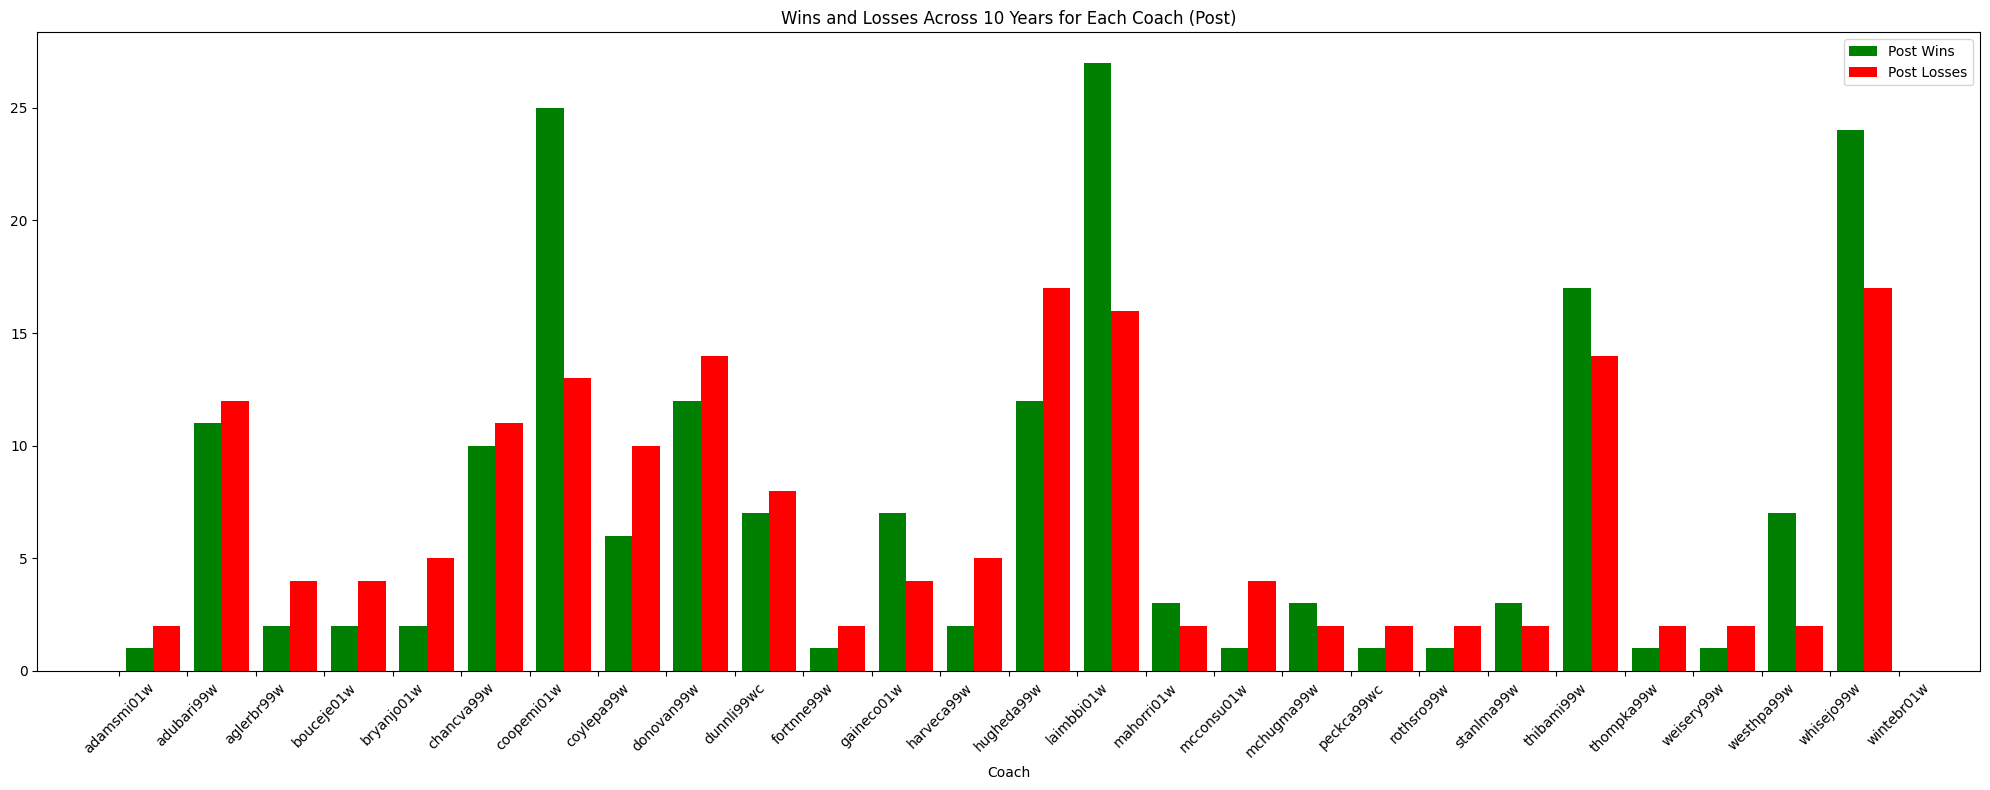

In [ ]:
grouped_data = coaches_df.groupby('coachID')[['post_wins', 'post_losses']].sum()

plt.figure(figsize=(20, 8))

post_grouped = grouped_data[(grouped_data['post_wins'] > 0) & (grouped_data['post_losses'] > 0)]

bins = range(len(post_grouped))

plt.hist([bins, bins], bins=bins, weights=[post_grouped['post_wins'], post_grouped['post_losses']], color=['green', 'red'], label=['Post Wins', 'Post Losses'])
plt.xlabel('Coach')
plt.xticks(bins, post_grouped.index)
plt.xticks(rotation=45)
plt.title('Wins and Losses Across 10 Years for Each Coach (Post)')
plt.legend(['Post Wins', 'Post Losses'])
plt.tight_layout()
plt.show()

In [37]:
coaches_df['total_wins'] = coaches_df['won'] + coaches_df['post_wins']

grouped_data = coaches_df.groupby('coachID')['total_wins'].sum()

top_5_coaches = grouped_data.nlargest(5)
top_5_coaches

coachID
coopemi01w    192
laimbbi01w    164
thibami99w    160
donovan99w    157
hugheda99w    157
Name: total_wins, dtype: int64

In [39]:
teams_by_top_coaches = coaches_df[coaches_df['coachID'].isin(top_5_coaches.index)]['tmID'].unique()
list(teams_by_top_coaches)

['LAS', 'IND', 'CHA', 'SEA', 'NYL', 'CLE', 'SAS', 'DET', 'CON']

In [40]:
teams_post_df = pd.read_csv('teams_post.csv')

teams_with_top_coaches_W = teams_post_df[teams_post_df['tmID'].isin(teams_by_top_coaches)].groupby('tmID')['W'].sum()

teams_with_top_coaches_W.sort_values(ascending=False)


tmID
DET    30
LAS    28
CON    17
NYL    17
IND    13
SEA    10
SAS     7
CLE     5
CHA     4
Name: W, dtype: int64

In [44]:
teams_df = pd.read_csv('teamsClean.csv')

teams_with_playoff_status_Y = teams_df[(teams_df['tmID'].isin(teams_by_top_coaches)) & (teams_df['playoff'] == 'Y')]
teams_with_playoff_status_Y.groupby('tmID').count()["playoff"].sort_values(ascending=False)

tmID
LAS    9
DET    7
NYL    7
SEA    7
CON    6
IND    6
CHA    3
CLE    3
SAS    3
Name: playoff, dtype: int64

In [18]:
players_teams_df = pd.read_csv('players_teams.csv')
grouped_points = players_teams_df.groupby('playerID')['points'].sum()
#players with most points across all 10 years
top20_players_points = grouped_points.nlargest(20)
top20_players_points

playerID
jacksla01w    5101
smithka01w    5096
leslili01w    4769
thompti01w    4762
catchta01w    4047
tauradi01w    4029
hammobe01w    4000
nolande01w    3971
smithta01w    3932
holdsch01w    3798
lennobe01w    3785
griffyo01w    3693
mcwilta01w    3674
douglka01w    3641
miltode01w    3626
salesny01w    3518
swoopsh01w    3502
melvich01w    3378
birdsu01w     3238
johnsvi01w    3193
Name: points, dtype: int64

In [19]:
top20_players = players_teams_df[players_teams_df['playerID'].isin(top20_players_points.index)]
tmID_values = top20_players.groupby('playerID')['tmID'].unique().apply(list).reset_index()

#change the order to top20 palyers
top20player_list = list(top20_players_points.index)
tmID_values['playerID'] = pd.Categorical(tmID_values['playerID'], categories=top20player_list, ordered=True)

tmID_values_sorted = tmID_values.sort_values(by='playerID')
tmID_values_sorted.reset_index(inplace=True, drop=True)
tmID_values_sorted

,playerID,tmID
0,jacksla01w,[SEA]
1,smithka01w,"[MIN, DET]"
2,leslili01w,[LAS]
3,thompti01w,"[HOU, LAS]"
4,catchta01w,[IND]
5,tauradi01w,[PHO]
6,hammobe01w,"[NYL, SAS]"
7,nolande01w,[DET]
8,smithta01w,"[SAC, CHA, PHO]"
9,holdsch01w,"[WAS, LAS, ATL]"


In [21]:
awards_df = pd.read_csv('awards_playersClean.csv')

more_awards = awards_df['playerID'].value_counts().head(10)
more_awards


playerID
leslili01w    10
swoopsh01w     8
catchta01w     5
tauradi01w     4
jacksla01w     4
thibami99w     2
parkeca01w     2
lennobe01w     2
staleda01w     2
coopecy01w     2
Name: count, dtype: int64

[players_clean_df['bioID'].isin(list(more_awards.index))].

In [22]:
tmID_values_sorted[tmID_values_sorted['playerID'].isin(list(more_awards.index))]

,playerID,tmID
0,jacksla01w,[SEA]
2,leslili01w,[LAS]
4,catchta01w,[IND]
5,tauradi01w,[PHO]
10,lennobe01w,"[MIN, MIA, CLE, SEA, ATL, LAS]"
16,swoopsh01w,"[HOU, SEA]"


In [57]:
# get unique values for teams with players with more awards
flattened_list = [i for sublist in list(tmID_values_sorted.tmID) for i in sublist]
unique_elements = list(set(flattened_list))
unique_elements

['NYL',
 'CLE',
 'MIN',
 'MIA',
 'DET',
 'HOU',
 'SAC',
 'CHA',
 'WAS',
 'ATL',
 'CON',
 'IND',
 'CHI',
 'ORL',
 'LAS',
 'SEA',
 'SAS',
 'PHO']

In [58]:
best_teams_playoff_status_Y = teams_df[(teams_df['tmID'].isin(unique_elements)) & (teams_df['playoff'] == 'Y')]
best_teams_playoff_status_Y.groupby('tmID').count()["playoff"].sort_values(ascending=False)

tmID
LAS    9
SAC    8
DET    7
NYL    7
SEA    7
CON    6
HOU    6
IND    6
WAS    5
SAS    3
CLE    3
CHA    3
PHO    3
MIN    2
ATL    1
ORL    1
MIA    1
Name: playoff, dtype: int64

In [59]:
#teams with best coaches (again for comparing)
teams_with_playoff_status_Y.groupby('tmID').count()["playoff"].sort_values(ascending=False)

tmID
LAS    9
DET    7
NYL    7
SEA    7
CON    6
IND    6
CHA    3
CLE    3
SAS    3
Name: playoff, dtype: int64

In [19]:
# Initialize an empty list to store data for all teams
team_data_list = []

for team in teams['tmID'].unique():
    # Create a DataFrame with 10 rows for the current team
    team_data = pd.DataFrame({'year': list(range(1, 11)),'tmID': [team] * 10})
    # Append the team data to the list
    team_data_list.append(team_data)

# Concatenate data for all teams into a single DataFrame
all_teams_data = pd.concat(team_data_list, ignore_index=True)
all_teams_data.set_index('year', inplace=True)

all_teams_data.to_csv('teams_year.csv')


In [32]:
players_teams = pd.read_csv('players_teams.csv')

team_year_points = players_teams.groupby(['tmID', 'year'])['points'].sum().reset_index()

teams_year = pd.read_csv('teams_year.csv')
# Iterate over unique 'tmID' values
for tmID in team_year_points['tmID'].unique():
    cumulative_sums = []
    cumulative_sum = 0
    for year in range(1, 11):
        year_sum = team_year_points.loc[(team_year_points['tmID'] == tmID) & (team_year_points['year'] == year), 'points'].sum()
        cumulative_sum += year_sum
        teams_year.loc[(teams_year['tmID'] == tmID) & (teams_year['year'] == year), 'cumulativePoints'] = cumulative_sum
        cumulative_sums.append(cumulative_sum)
    print(f"tmID: {tmID}, Cumulative Sums of Points: {cumulative_sums}")

teams_year['cumulativePoints'] = teams_year['cumulativePoints'].round().astype(int)
teams_year.to_csv('teams_year.csv',index=False)

tmID: ATL, Cumulative Sums of Points: [0, 0, 0, 0, 0, 0, 0, 0, 2314, 5175]
tmID: CHA, Cumulative Sums of Points: [2186, 4241, 6387, 8595, 10687, 12782, 15238, 15238, 15238, 15238]
tmID: CHI, Cumulative Sums of Points: [0, 0, 0, 0, 0, 0, 2322, 4847, 7319, 9832]
tmID: CLE, Cumulative Sums of Points: [2185, 4189, 6260, 8489, 8489, 8489, 8489, 8489, 8489, 8489]
tmID: CON, Cumulative Sums of Points: [0, 0, 0, 2384, 4719, 7193, 9876, 12551, 15157, 17808]
tmID: DET, Cumulative Sums of Points: [2331, 4434, 6548, 9101, 11467, 13714, 16241, 18761, 21433, 24085]
tmID: HOU, Cumulative Sums of Points: [2475, 4522, 6594, 8838, 11015, 13324, 15752, 18240, 20679, 20679]
tmID: IND, Cumulative Sums of Points: [2213, 4366, 6463, 8800, 10998, 13168, 15603, 18083, 20556, 23162]
tmID: LAS, Cumulative Sums of Points: [2417, 4858, 7310, 9809, 12304, 14630, 17205, 19738, 22336, 24869]
tmID: MIA, Cumulative Sums of Points: [1831, 3788, 5834, 5834, 5834, 5834, 5834, 5834, 5834, 5834]
tmID: MIN, Cumulative Sums o

In [31]:

players_teams = pd.read_csv('players_teams.csv')

team_year_points = players_teams.groupby(['tmID', 'year'])['points'].sum().reset_index()

teams_year = pd.read_csv('teams_year.csv')

# Iterate over unique 'tmID' values
for tmID in team_year_points['tmID'].unique():
    year_sums = []
    for year in range(1, 11):
        year_sum = team_year_points.loc[(team_year_points['tmID'] == tmID) & (team_year_points['year'] == year), 'points'].sum()
        year_sums.append(year_sum)
        teams_year.loc[(teams_year['tmID'] == tmID) & (teams_year['year'] == year), 'totalPoints'] = year_sum


    print(f"tmID: {tmID}, Yearly Sums of Points: {year_sums}")

teams_year['totalPoints'] = teams_year['totalPoints'].round().astype(int)
teams_year.to_csv('teams_year.csv',index=False)


tmID: ATL, Yearly Sums of Points: [0, 0, 0, 0, 0, 0, 0, 0, 2314, 2861]
tmID: CHA, Yearly Sums of Points: [2186, 2055, 2146, 2208, 2092, 2095, 2456, 0, 0, 0]
tmID: CHI, Yearly Sums of Points: [0, 0, 0, 0, 0, 0, 2322, 2525, 2472, 2513]
tmID: CLE, Yearly Sums of Points: [2185, 2004, 2071, 2229, 0, 0, 0, 0, 0, 0]
tmID: CON, Yearly Sums of Points: [0, 0, 0, 2384, 2335, 2474, 2683, 2675, 2606, 2651]
tmID: DET, Yearly Sums of Points: [2331, 2103, 2114, 2553, 2366, 2247, 2527, 2520, 2672, 2652]
tmID: HOU, Yearly Sums of Points: [2475, 2047, 2072, 2244, 2177, 2309, 2428, 2488, 2439, 0]
tmID: IND, Yearly Sums of Points: [2213, 2153, 2097, 2337, 2198, 2170, 2435, 2480, 2473, 2606]
tmID: LAS, Yearly Sums of Points: [2417, 2441, 2452, 2499, 2495, 2326, 2575, 2533, 2598, 2533]
tmID: MIA, Yearly Sums of Points: [1831, 1957, 2046, 0, 0, 0, 0, 0, 0, 0]
tmID: MIN, Yearly Sums of Points: [2193, 1894, 1689, 2077, 1911, 2014, 2376, 2520, 2767, 2731]
tmID: NYL, Yearly Sums of Points: [2148, 2162, 2089, 2243

In [33]:
players_teams = pd.read_csv('players_teams.csv')

team_year_minutes = players_teams.groupby(['tmID', 'year'])['minutes'].sum().reset_index()

teams_year = pd.read_csv('teams_year.csv')

# Iterate over unique 'tmID' values
for tmID in team_year_minutes['tmID'].unique():
    year_sums = []
    for year in range(1, 11):
        year_sum = team_year_minutes.loc[(team_year_minutes['tmID'] == tmID) & (team_year_minutes['year'] == year), 'minutes'].sum()
        year_sums.append(year_sum)
        teams_year.loc[(teams_year['tmID'] == tmID) & (teams_year['year'] == year), 'totalMinutes'] = year_sum


    print(f"tmID: {tmID}, Minutes Played: {year_sums}")

teams_year['totalMinutes'] = teams_year['totalMinutes'].round().astype(int)
teams_year.to_csv('teams_year.csv',index=False)

tmID: ATL, Minutes Played: [0, 0, 0, 0, 0, 0, 0, 0, 6364, 6951]
tmID: CHA, Minutes Played: [6475, 6500, 6058, 6806, 6900, 6945, 6825, 0, 0, 0]
tmID: CHI, Minutes Played: [0, 0, 0, 0, 0, 0, 6800, 6975, 6875, 6674]
tmID: CLE, Minutes Played: [6500, 6425, 6550, 6825, 0, 0, 0, 0, 0, 0]
tmID: CON, Minutes Played: [0, 0, 0, 6875, 6900, 6800, 6827, 6924, 6477, 6976]
tmID: DET, Minutes Played: [6425, 6550, 6450, 6900, 6850, 6925, 6825, 6402, 6875, 6976]
tmID: HOU, Minutes Played: [6475, 6450, 6425, 6825, 6850, 6875, 6651, 6698, 6560, 0]
tmID: IND, Minutes Played: [6425, 6475, 6425, 6875, 6850, 6925, 6850, 6874, 6952, 6924]
tmID: LAS, Minutes Played: [6450, 6475, 6475, 6900, 6975, 6800, 6825, 6900, 7002, 6925]
tmID: MIA, Minutes Played: [6475, 6575, 6475, 0, 0, 0, 0, 0, 0, 0]
tmID: MIN, Minutes Played: [6425, 5750, 5452, 5729, 5872, 6092, 6153, 6377, 6901, 6874]
tmID: NYL, Minutes Played: [6425, 6400, 6450, 6850, 6900, 6925, 6876, 6851, 6901, 6902]
tmID: ORL, Minutes Played: [6500, 6450, 6525, 

In [7]:
import pandas as pd

df = pd.read_csv('players_teams.csv')

team_player_counts = df.groupby(['tmID', 'year'])['playerID'].nunique().reset_index()

team_player_counts.to_csv('teams_pc.csv',index=False)
team_player_counts


,tmID,year,playerID
0,ATL,9,14
1,ATL,10,13
2,CHA,1,13
3,CHA,2,12
4,CHA,3,13
...,...,...,...
137,WAS,6,13
138,WAS,7,12
139,WAS,8,15
140,WAS,9,16


In [16]:
coaches = pd.read_csv('coaches.csv')
coach_wins = coaches.groupby(['year', 'tmID'])['won'].sum().reset_index()
coach_loss = coaches.groupby(['year', 'tmID'])['lost'].sum().reset_index()


In [20]:
merged_df = pd.merge(teams_year, coach_wins, on=['tmID', 'year'], how='left')
merged_df = pd.merge(merged_df, coach_loss, on=['tmID', 'year'], how='left')

# Rename the 'won' column to 'yearlyWins', and 'lost' to 'yearlyLoss'
merged_df.rename(columns={'won': 'yearlyWins'}, inplace=True)
merged_df.rename(columns={'lost': 'yearlyLosses'}, inplace=True)

merged_df['yearlyWins'] = merged_df['yearlyWins'].round().fillna(0).astype(int)
merged_df['yearlyLosses'] = merged_df['yearlyLosses'].round().fillna(0).astype(int)

merged_df.to_csv('teams_year.csv',index=False)
merged_df

,year,tmID,totalPoints,cumulativePoints,totalMinutes,yearlyWins,yearlyLosses
0,1,ATL,0,0,0,0,0
1,2,ATL,0,0,0,0,0
2,3,ATL,0,0,0,0,0
3,4,ATL,0,0,0,0,0
4,5,ATL,0,0,0,0,0
...,...,...,...,...,...,...,...
195,6,WAS,2263,13157,6900,16,18
196,7,WAS,2747,15904,6850,18,16
197,8,WAS,2585,18489,6891,16,18
198,9,WAS,2368,20857,6825,10,24


In [1]:
import pandas as pd
coaches_df = pd.read_csv('coaches.csv')
grouped_coaches = coaches_df.groupby(['tmID', 'year'])['coachID'].first().reset_index()


In [2]:
grouped_coaches

,tmID,year,coachID
0,ATL,9,meadoma99w
1,ATL,10,meadoma99w
2,CHA,1,dunntr01wc
3,CHA,2,donovan99w
4,CHA,3,donovan99w
...,...,...,...
137,WAS,6,adubari99w
138,WAS,7,adubari99w
139,WAS,8,adubari99w
140,WAS,9,kenlaje99w


In [24]:
teams_df = pd.read_csv('teams_year.csv')

merged_df = pd.merge(teams_df, grouped_coaches, on=['tmID', 'year'], how='left')

merged_df.fillna('none', inplace=True)

In [27]:
merged_df.to_csv('team_year.csv', index=False)

In [30]:
team_year_df = pd.read_csv('team_year.csv')

dummies = pd.get_dummies(team_year_df['coachID'], prefix='coach')

dummies_integers = dummies.astype(int)

df_with_dummies = pd.concat([team_year_df, dummies_integers], axis=1)

df_with_dummies.drop('coachID', axis=1, inplace=True)

In [32]:
df_with_dummies.to_csv('team_yearC.csv', index=False)

In [40]:

awards_df = pd.read_csv('awards_playersClean.csv')

awards_dummies = pd.get_dummies(awards_df['award'])

awards_dummies_integers = awards_dummies.astype(int)

awards_df_with_dummies = pd.concat([awards_df, awards_dummies_integers], axis=1)

awards_df_with_dummies.drop('award', axis=1, inplace=True)

In [42]:
awards_df_with_dummies.to_csv('awards_playersClean.csv', index=False)

In [ ]:

players_teams_df = pd.read_csv('players_teams.csv')


players_teams_df['threeRatio'] = players_teams_df['threeMade'] / players_teams_df['threeAttempted']

players_teams_df.drop(['threeMade', 'threeAttempted'], axis=1, inplace=True)

In [46]:
team_p_df = players_teams_df.round(2)


team_p_df.fillna(0, inplace=True)

# Reorder columns with 'threeRatio' before 'dq'
column_order = list(team_p_df.columns)
column_order.remove('threeRatio')  # Remove 'threeRatio' from the list of columns
column_order.insert(column_order.index('dq'), 'threeRatio')  # Insert 'threeRatio' before 'dq'


team_p_df = team_p_df[column_order]
team_p_df.to_csv('players_teams.csv', index=False)

In [47]:

players_teams_df = pd.read_csv('players_teams.csv')


players_teams_df['ftRatio'] = players_teams_df['ftMade'] / players_teams_df['ftAttempted']

players_teams_df.drop(['ftMade', 'ftAttempted'], axis=1, inplace=True)
team_p_df = players_teams_df.round(2)


team_p_df.fillna(0, inplace=True)

column_order = list(team_p_df.columns)
column_order.remove('ftRatio')  
column_order.insert(column_order.index('threeRatio'), 'ftRatio')  


team_p_df = team_p_df[column_order]
team_p_df.to_csv('players_teams.csv', index=False)

In [48]:
players_teams_df = pd.read_csv('players_teams.csv')


players_teams_df['fgRatio'] = players_teams_df['fgMade'] / players_teams_df['fgAttempted']

players_teams_df.drop(['fgMade', 'fgAttempted'], axis=1, inplace=True)
team_p_df = players_teams_df.round(2)


team_p_df.fillna(0, inplace=True)

column_order = list(team_p_df.columns)
column_order.remove('fgRatio')  
column_order.insert(column_order.index('ftRatio'), 'fgRatio')  


team_p_df = team_p_df[column_order]
team_p_df.to_csv('players_teams.csv', index=False)